## Polynomial Regression

### Loading of Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Loading of Data

In [2]:
df = pd.read_csv('Position_Salary.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Scatterplot

A scatterplot was created to see the relationship between the independent variable Level and the dependent variable Salary. The relationship is somewhat linear but not a perfect linear relationship. 

Text(0.5,1,'Level vs. Salary')

<Figure size 1440x576 with 0 Axes>

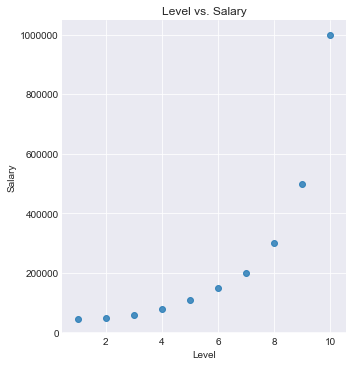

In [3]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,8))
sns.lmplot(x="Level", y="Salary", data=df, fit_reg =False)
plt.title('Level vs. Salary')

### Correlation

The correlation between Level and Salary was conducted and the results show that these to variables have a high correlation. 

In [4]:
cor = df.corr()
cor

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


### Spliting data in to X & Y

In [5]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

### Basic Linear Model

Based on the R-squared and the plot below this model is not a good fit for seeing if the new employee is bluffing. The R-squared of 0.51 shows that the model does not explain much of the variance in the dependent variable. The scatterplot blow has Level on the x-axis and Salary on the y-axis with a blue line, which shows the outcome when the Level values are predicted with the formula created. The line is no ware near the red points, which are the actual salaries.  A salary prediction of 209,060 does not make sense for a Level 5 employee. 

Model Coef: [80878.78787879]
Model Intercept: -195333.3333333332
Model R-squared: 0.5053238120653418
--------------------------------------------------------------------------------
Predicting for Salary for HR: [209060.60606061]


Text(0,0.5,'Salary')

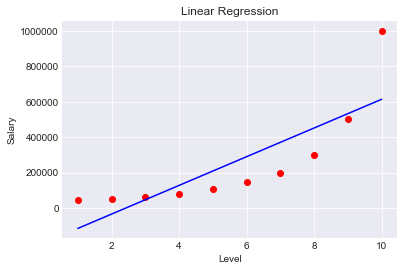

In [6]:
lin = LinearRegression().fit(X,y)
print('Model Coef: {}'.format(lin.coef_))
print('Model Intercept: {}'.format(lin.intercept_))
y_pred = lin.predict(X)
print('Model R-squared: {}'.format(r2_score(y_pred, y)))
print('--'*40)
pred = lin.predict([[5]])
print('Predicting for Salary for HR:', pred)
plt.scatter(X,y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Level')
plt.ylabel('Salary')

### Ploynoimal Regression With Linear Degree 2

Based on the R-squared and the plot below this model is somewhat of a good fit for seeing if the new employee is bluffing. The R-squared of 0.90 shows that the model explains most of the variance in the dependent variable. The scatterplot blow shows that the model fits well but is not perfect. The model seems to predict low for a level 5 employee. A salary prediction for a Level 5 employee of 53,606 backs this observation up. 

Model Coef: [      0.         -132871.21212121   19431.81818182]
Model Intercept: 232166.6666666665
Model R-squared: 0.908545049225284
--------------------------------------------------------------------------------
Predicting for Salary for HR: [53606.06060606]


Text(0,0.5,'Salary')

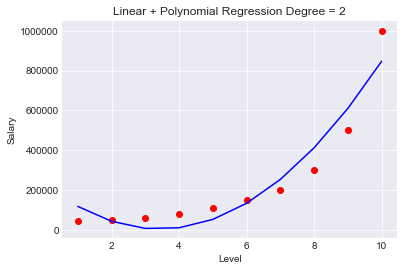

In [7]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
print('Model Coef: {}'.format(pol_reg.coef_))
print('Model Intercept: {}'.format(pol_reg.intercept_))
y_pred = pol_reg.predict(X_poly)
r2_lin2 = r2_score(y_pred, y)
print('Model R-squared: {}'.format(r2_lin2))
print('--'*40)
pred1 = pol_reg.predict(poly_reg.transform([[5]]))
print('Predicting for Salary for HR:', pred1)
plt.scatter(X,y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Linear + Polynomial Regression Degree = 2')
plt.xlabel('Level')
plt.ylabel('Salary')

### Ploynoimal Regression With Linear Degree 3

The R-squared of 0.98 shows that the model explains almost all of the variance in the dependent variable. The scatterplot blow shows that the model fits well but is still a little low when it comes to predicting of a Level 5 employee. A salary prediction for a Level 5 employee of 83,270 backs this observation up. 

Model Coef: [     0.         180664.33566432 -48548.95104895   4120.04662005]
Model Intercept: -121333.33333331218
Model R-squared: 0.9808499387901433
--------------------------------------------------------------------------------
Predicting for Salary for HR: [83270.3962704]


Text(0,0.5,'Salary')

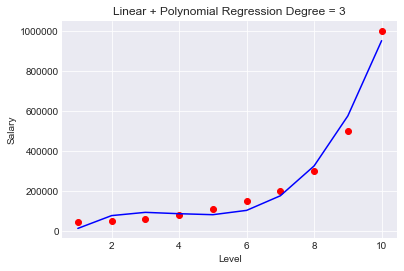

In [8]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
print('Model Coef: {}'.format(pol_reg.coef_))
print('Model Intercept: {}'.format(pol_reg.intercept_))
y_pred = pol_reg.predict(X_poly)
r2_lin3 = r2_score(y_pred, y)
print('Model R-squared: {}'.format(r2_lin3))
print('--'*40)
pred2 = pol_reg.predict(poly_reg.transform([[5]]))
print('Predicting for Salary for HR:', pred2)
plt.scatter(X,y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Linear + Polynomial Regression Degree = 3')
plt.xlabel('Level')
plt.ylabel('Salary')

### Ploynoimal Regression With Linear Degree 4

The R-squared of 0.997 shows that the model explains all of the variance in the dependent variable. The scatterplot blow shows that the model fit is almost perfect. A salary prediction for a Level 5 employee of 132,148 is a little high, which points to this model being over fit to the training data. 

Model Coef: [      0.         -211002.33100266   94765.44289054  -15463.2867133
     890.15151515]
Model Intercept: 184166.6666670672
Model R-squared: 0.9973854712356878
--------------------------------------------------------------------------------
Predicting for Salary for HR: [132148.43750003]


Text(0,0.5,'Salary')

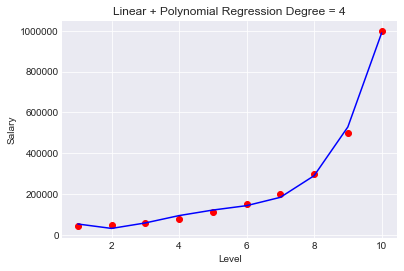

In [9]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
print('Model Coef: {}'.format(pol_reg.coef_))
print('Model Intercept: {}'.format(pol_reg.intercept_))
y_pred = pol_reg.predict(X_poly)
r2_lin4 = r2_score(y_pred, y)
print('Model R-squared: {}'.format(r2_lin4))
print('--'*40)
pred3 = pol_reg.predict(poly_reg.transform([[5.5]]))
print('Predicting for Salary for HR:', pred3)
plt.scatter(X,y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Linear + Polynomial Regression Degree = 4')
plt.xlabel('Level')
plt.ylabel('Salary')

### Ridge Regression

### Ploynoimal Regression With Ridge Degree 2

The R-squared of 0.90 shows that the model explains most of the variance in the dependent variable. The scatterplot shows that the model fit is good but could be better. A salary prediction for a Level 5 employee of 71,011 is a little low. 

Model Coef: [      0.         -106754.76419101   17175.2317465 ]
Model Intercept: 175404.7808102807
Model R-squared: 0.9012166755290071
--------------------------------------------------------------------------------
Predicting for Salary for HR: [71011.75351775]


Text(0,0.5,'Salary')

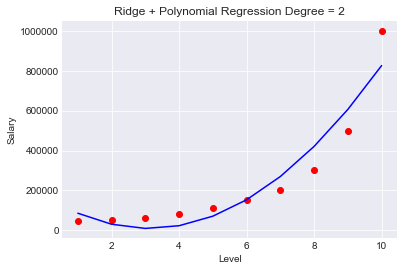

In [10]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = Ridge()
pol_reg.fit(X_poly, y)
print('Model Coef: {}'.format(pol_reg.coef_))
print('Model Intercept: {}'.format(pol_reg.intercept_))
y_pred = pol_reg.predict(X_poly)
r2_rid2 = r2_score(y_pred, y)
print('Model R-squared: {}'.format(r2_rid2))
print('--'*40)
pred4 = pol_reg.predict(poly_reg.transform([[5]]))
print('Predicting for Salary for HR:', pred4)
plt.scatter(X,y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Ridge + Polynomial Regression Degree = 2')
plt.xlabel('Level')
plt.ylabel('Salary')

### Ploynoimal Regression With Ridge Degree 3

The R-squared of 0.97 shows that the model explains most of the variance in the dependent variable. The scatterplot shows that the model fit is good, but when looking at the blue line there seems to be points where the model is predicting much lower or much higher. A salary prediction for a Level 5 employee of 63,508 is low. 

Model Coef: [     0.          54794.8886108  -23043.47813546   2646.09087562]
Model Intercept: 34859.53098167229
Model R-squared: 0.9708516334586302
--------------------------------------------------------------------------------
Predicting for Salary for HR: [63508.38010126]


Text(0,0.5,'Salary')

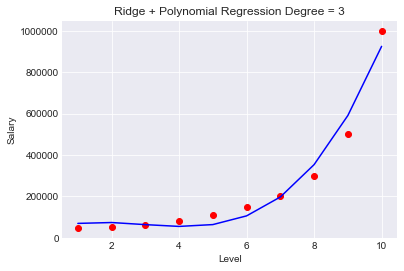

In [11]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = Ridge()
pol_reg.fit(X_poly, y)
print('Model Coef: {}'.format(pol_reg.coef_))
print('Model Intercept: {}'.format(pol_reg.intercept_))
y_pred = pol_reg.predict(X_poly)
r2_rid3 = r2_score(y_pred, y)
print('Model R-squared: {}'.format(r2_rid3))
print('--'*40)
pred5 = pol_reg.predict(poly_reg.transform([[5]]))
print('Predicting for Salary for HR:', pred5)
plt.scatter(X,y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Ridge + Polynomial Regression Degree = 3')
plt.xlabel('Level')
plt.ylabel('Salary')

### Ploynoimal Regression With Ridge Degree 4

The R-squared of 0.993 shows that the model explains most of the variance in the dependent variable. The scatterplot shows that the model fit is almost perfect. The blue line shows a great fit and doesn’t seem to be to over fit. A salary prediction for a Level 5 employee of 107,423 seems about right. 

Model Coef: [    0.         -6397.56562921 23714.21579411 -6137.96307511
   479.28612486]
Model Intercept: 14247.592993241851
Model R-squared: 0.9935580296705666
--------------------------------------------------------------------------------
Predicting for Salary for HR: [107423.60335064]


Text(0,0.5,'Salary')

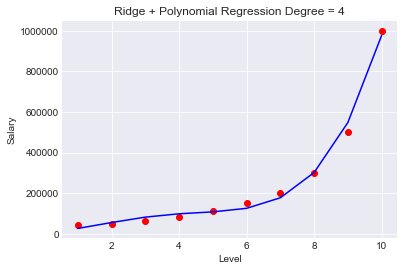

In [12]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = Ridge()
pol_reg.fit(X_poly, y)
print('Model Coef: {}'.format(pol_reg.coef_))
print('Model Intercept: {}'.format(pol_reg.intercept_))
y_pred = pol_reg.predict(X_poly)
r2_rid4 = r2_score(y_pred, y)
print('Model R-squared: {}'.format(r2_rid4))
print('--'*40)
pred6 = pol_reg.predict(poly_reg.transform([[5]]))
print('Predicting for Salary for HR:', pred6)
plt.scatter(X,y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Ridge + Polynomial Regression Degree = 4')
plt.xlabel('Level')
plt.ylabel('Salary')

### Lasso Regression

### Ploynoimal Regression With Ridge Degree 2

The R-squared of 0.90 shows that the model explains most of the variance in the dependent variable. The scatterplot shows that the model fit is somewhat of a good fit. When looking at the blue line there seems to be points where the model is predicting much lower or much higher than the actual salaries. A salary prediction for a Level 5 employee of 53,607 is really low. 

Model Coef: [      0.         -132868.46936253   19431.58041449]
Model Intercept: 232160.73553605692
Model R-squared: 0.9085446556716869
--------------------------------------------------------------------------------
Predicting for Salary for HR: [53607.89908565]


Text(0,0.5,'Salary')

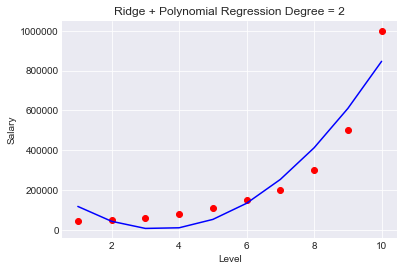

In [13]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = Lasso()
pol_reg.fit(X_poly, y)
print('Model Coef: {}'.format(pol_reg.coef_))
print('Model Intercept: {}'.format(pol_reg.intercept_))
y_pred = pol_reg.predict(X_poly)
r2_las2 = r2_score(y_pred, y)
print('Model R-squared: {}'.format(r2_las2))
print('--'*40)
pred7 = pol_reg.predict(poly_reg.transform([[5]]))
print('Predicting for Salary for HR:', pred7)
plt.scatter(X,y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Ridge + Polynomial Regression Degree = 2')
plt.xlabel('Level')
plt.ylabel('Salary')

### Ploynoimal Regression With Ridge Degree 3

The R-squared of 0.97 shows that the model explains most of the variance in the dependent variable. The scatterplot shows that the model fit is good, but there are still points where the model is predicting a little higher or lower than the actual salaries. A salary prediction for a Level 5 employee of 73,850 is low. 

Model Coef: [     0.         110222.40887607 -33856.77001754   3254.11209895]
Model Intercept: -37606.513074315386
Model R-squared: 0.9774534482257463
--------------------------------------------------------------------------------
Predicting for Salary for HR: [73850.29323582]


Text(0,0.5,'Salary')

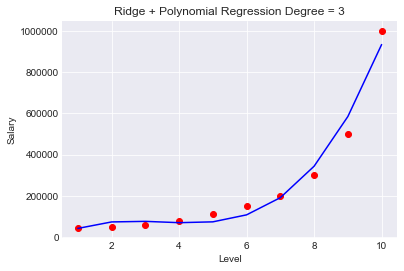

In [14]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = Lasso()
pol_reg.fit(X_poly, y)
print('Model Coef: {}'.format(pol_reg.coef_))
print('Model Intercept: {}'.format(pol_reg.intercept_))
y_pred = pol_reg.predict(X_poly)
r2_las3 = r2_score(y_pred, y)
print('Model R-squared: {}'.format(r2_las3))
print('--'*40)
pred8 = pol_reg.predict(poly_reg.transform([[5]]))
print('Predicting for Salary for HR:', pred8)
plt.scatter(X,y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Ridge + Polynomial Regression Degree = 3')
plt.xlabel('Level')
plt.ylabel('Salary')

### Ploynoimal Regression With Ridge Degree 4

The R-squared of 0.987 shows that the model explains most of the variance in the dependent variable. The scatterplot shows that the model fit is all most perfect. The blue line seems to cover the shape of the actual salaries.  A salary prediction for a Level 5 employee of 93,845 is a little low. 

Model Coef: [ 0.00000000e+00  1.12096627e+05 -2.06567040e+04  7.02615912e+00
  1.97675472e+02]
Model Intercept: -74645.03061477805
Model R-squared: 0.9872389646547449
--------------------------------------------------------------------------------
Predicting for Salary for HR: [93845.94360665]


Text(0,0.5,'Salary')

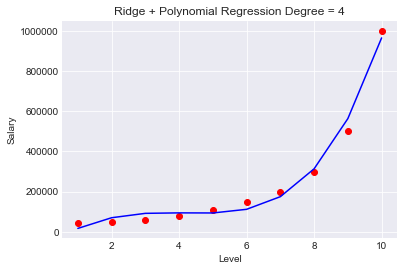

In [15]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = Lasso()
pol_reg.fit(X_poly, y)
print('Model Coef: {}'.format(pol_reg.coef_))
print('Model Intercept: {}'.format(pol_reg.intercept_))
y_pred = pol_reg.predict(X_poly)
r2_las4 = r2_score(y_pred, y)
print('Model R-squared: {}'.format(r2_las4))
print('--'*40)
pred9 = pol_reg.predict(poly_reg.transform([[5]]))
print('Predicting for Salary for HR:',pred9)
plt.scatter(X,y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Ridge + Polynomial Regression Degree = 4')
plt.xlabel('Level')
plt.ylabel('Salary')

### Models, R2, Prediction

In [16]:
r_squared = [r2_lin2, r2_lin3, r2_lin4, r2_rid2,r2_rid3, 
             r2_rid4, r2_las2, r2_las3, r2_las4 ]

nam = ['Lin Degree = 2','Lin Degree = 3','Lin Degree = 4',
       'Ridge Degree = 2','Ridge Degree = 3','Ridge Degree = 4',
      'Lasso Degree = 2','Lasso Degree = 3','Lasso Degree = 4']

pred_out = [pred1, pred2,pred3, pred4, pred5, pred6,pred7,pred8, pred9]

r2 = pd.DataFrame(r_squared, columns=['R2'])

models = pd.DataFrame(nam, columns=['Models'])

pred_df = pd.DataFrame(pred_out, columns=['Prediction'])

pd.concat([models, r2,round(pred_df,0)], axis = 1)


,Models,R2,Prediction
0,Lin Degree = 2,0.908545,53606.0
1,Lin Degree = 3,0.980850,83270.0
2,Lin Degree = 4,0.997385,132148.0
3,Ridge Degree = 2,0.901217,71012.0
4,Ridge Degree = 3,0.970852,63508.0
5,Ridge Degree = 4,0.993558,107424.0
6,Lasso Degree = 2,0.908545,53608.0
7,Lasso Degree = 3,0.977453,73850.0
8,Lasso Degree = 4,0.987239,93846.0


### Conclusion

When examining all the models together and looking back at the scatterplots the ridge regression model with 4 degrees is the best model. The scatterplot shows that it is not to over fit to the data and the R-squared shows that the model can explain almost all of the variance in the dependent variable. The prediction of 107,424 make sense as a salary for a Level 5 employee. Based on this information we can say that the new employee is bluffing and wasn’t being payed 123,000. 